## Observations and Insights 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results_df = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID"])

# Display the data table for preview
mouse_study_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice.
No_Of_Mice = len(mouse_study_results_df["Mouse ID"].unique())

print(f"No of Mice used for experiment is {No_Of_Mice}")

No of Mice used for experiment is 249


In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ids = mouse_study_results_df[mouse_study_results_df.duplicated(["Mouse ID","Timepoint"])][{"Mouse ID","Timepoint"}]
duplicate_mice_ids.head(10)

,Timepoint,Mouse ID
909,0,g989
911,5,g989
913,10,g989
915,15,g989
917,20,g989


In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ids_all_data = mouse_study_results_df[mouse_study_results_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice_ids_all_data.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_study_results_df = mouse_study_results_df.drop_duplicates(['Mouse ID', 'Timepoint']).copy()
clean_mice_study_results_df = clean_mice_study_results_df.dropna(how="any",subset = ['Timepoint'])
clean_mice_study_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice_study_results_df["Mouse ID"].unique())
No_of_mouse = len(clean_mice_study_results_df["Mouse ID"].unique())
print(f"No of mouse used for testing are : {No_of_mouse}")

No of mouse used for testing are : 249


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
clean_mice_study_results_summary_init_df = clean_mice_study_results_df.groupby(["Drug Regimen"])
clean_mice_study_results_summary_df_avarage = clean_mice_study_results_summary_init_df["Tumour Volume (mm3)"].mean()
clean_mice_study_results_summary_df_medium = clean_mice_study_results_summary_init_df["Tumour Volume (mm3)"].median()
clean_mice_study_results_summary_df_variance = clean_mice_study_results_summary_init_df["Tumour Volume (mm3)"].var()
clean_mice_study_results_summary_df_SEM = clean_mice_study_results_summary_init_df["Tumour Volume (mm3)"].sem()
clean_mice_study_results_summary_df_STDDev = clean_mice_study_results_summary_init_df["Tumour Volume (mm3)"].std()
clean_mice_study_results_summary_df_DrugRegimen = clean_mice_study_results_summary_init_df["Drug Regimen"].max()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
clean_mice_study_results_summary_df = pd.DataFrame({
"Mean of Tumour Volume(mm3)":clean_mice_study_results_summary_df_avarage,
"Median of Tumour Volume(mm3)":clean_mice_study_results_summary_df_medium,
"Variance of Tumour Volume(mm3)":clean_mice_study_results_summary_df_variance,
"Median of Tumour Volume(mm3)":clean_mice_study_results_summary_df_medium,
"Standard deviation of Tumour Volume(mm3)":clean_mice_study_results_summary_df_STDDev,
"SEM of Tumour Volume(mm3)":clean_mice_study_results_summary_df_SEM}
)

clean_mice_study_results_summary_df


,Mean of Tumour Volume(mm3),Median of Tumour Volume(mm3),Variance of Tumour Volume(mm3),Standard deviation of Tumour Volume(mm3),SEM of Tumour Volume(mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_mice_study_results_summary_df_v1 = clean_mice_study_results_summary_init_df.agg({"Tumour Volume (mm3)": ['mean', 'median', 'var','std','sem']})
clean_mice_study_results_summary_df_v1.columns=[ "Mean of Tumour Volume(mm3)", "Median of Tumour Volume(mm3)","Variance of Tumour Volume(mm3)","Standard deviation of Tumour Volume(mm3)", "SEM of Tumour Volume(mm3)" ]
clean_mice_study_results_summary_df_v1

,Mean of Tumour Volume(mm3),Median of Tumour Volume(mm3),Variance of Tumour Volume(mm3),Standard deviation of Tumour Volume(mm3),SEM of Tumour Volume(mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

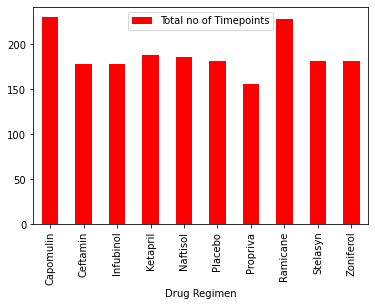

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_mice_study_results_summary_df_DrugRegimen_count = clean_mice_study_results_summary_init_df["Timepoint"].count()
clean_mice_study_results_summary_df_DrugRegimen_name = clean_mice_study_results_summary_init_df["Drug Regimen"].max()

clean_mice_study_results_drug_regimen_df = pd.DataFrame({'Drug Regimen':clean_mice_study_results_summary_df_DrugRegimen_name, 'Total no of Timepoints':clean_mice_study_results_summary_df_DrugRegimen_count})
ax = clean_mice_study_results_drug_regimen_df.plot(kind="bar", x='Drug Regimen', y='Total no of Timepoints',color=["red"] )




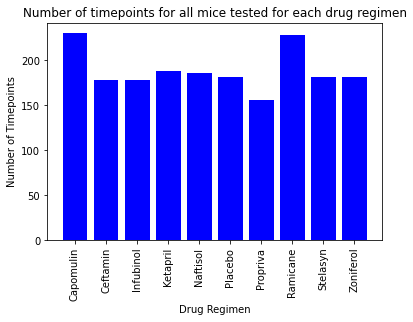

<Figure size 2880x2304 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(clean_mice_study_results_summary_df_DrugRegimen_count))
plt.bar(x_axis, clean_mice_study_results_summary_df_DrugRegimen_count, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, clean_mice_study_results_summary_df_DrugRegimen_name,rotation='vertical')
plt.title("Number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.figure(figsize=(40,32))
plt.show()
plt.savefig("Images/MiceTestedTimepoint_Plt.png")


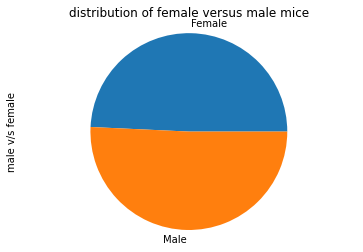

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

clean_mice_study_results_groupby_gender_df = clean_mice_study_results_df.groupby("Sex")
clean_mice_study_results_groupby_gender_sum_df = clean_mice_study_results_groupby_gender_df["Sex"].count()
male_female_pie = clean_mice_study_results_groupby_gender_sum_df.plot(kind="pie", y='Male Female Distribution', title=("distribution of female versus male mice"))
male_female_pie.set_ylabel("male v/s female")

plt.axis("equal")
plt.show()





(-1.1027019432331793,
 1.1054948118841157,
 -1.211214051424959,
 1.1082640514693718)

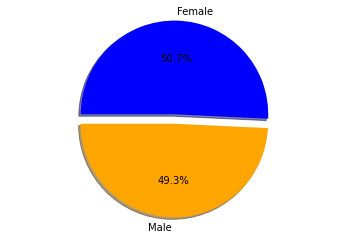

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = clean_mice_study_results_df["Sex"].unique()

# The values of each section of the pie chart
sizes = clean_mice_study_results_groupby_gender_sum_df.copy()

# The colours of each section of the pie chart
colours = ["orange", "blue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(sizes, labels=labels, explode= explode, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
clean_mice_study_results_df_v1 = clean_mice_study_results_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
clean_mice_study_results_v2 = clean_mice_study_results_df.merge(clean_mice_study_results_df_v1,how="inner", on=["Mouse ID","Timepoint"])
clean_mice_study_results_v2



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [33]:

# Put treatments into a list for for loop (and later for plot labels)
label_drug_regime = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumour vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumour volumes
# add subset 
# Determine outliers using upper and lower bounds
clean_mice_study_results_v3= clean_mice_study_results_v2.loc[clean_mice_study_results_v2["Drug Regimen"].isin(label_drug_regime)]
for drug_regimen in label_drug_regime:
    tumor_list_per_regime = clean_mice_study_results_v3.loc[clean_mice_study_results_v2["Drug Regimen"]==drug_regimen]
    quartiles = tumor_list_per_regime["Tumour Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles [0.25]
    upperq = quartiles [0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of Tumour Volume (mm3) for {drug_regimen} is: {lowerq}")
    print(f"The upper quartile of Tumour Volume (mm3) for {drug_regimen} is: {upperq}")
    print(f"The interquartile range of of Tumour Volume (mm3) for {drug_regimen} is:: {iqr}")
    print(f"The the median of Tumour Volume (mm3) for {drug_regimen} is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


   
    

The lower quartile of Tumour Volume (mm3) for Capomulin is: 32.37735684
The upper quartile of Tumour Volume (mm3) for Capomulin is: 40.1592203
The interquartile range of of Tumour Volume (mm3) for Capomulin is:: 7.781863460000004
The the median of Tumour Volume (mm3) for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Tumour Volume (mm3) for Ramicane is: 31.56046955
The upper quartile of Tumour Volume (mm3) for Ramicane is: 40.65900627
The interquartile range of of Tumour Volume (mm3) for Ramicane is:: 9.098536719999998
The the median of Tumour Volume (mm3) for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Tumour Volume (mm3) for Infubinol is: 54.04860769
The upper quartile of Tumour Volume (mm3) for Infubinol is: 65.52574285
The interquartile range of of Tumour Volume (mm3) for Infubinol i

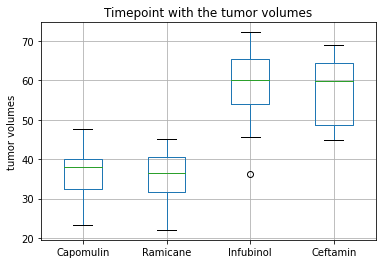

In [34]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
x_axis = np.arange(0, len(label_drug_regime), 1) + 1
ax1.set_title('Timepoint with the tumor volumes')
ax1.set_ylabel('tumor volumes')
ax.set_xlim(0, len(label_drug_regime) + 1)
tumor_volumes_label = pd.DataFrame({
'Capomulin':clean_mice_study_results_v3.loc[clean_mice_study_results_v2["Drug Regimen"]=='Capomulin']["Tumour Volume (mm3)"],
'Ramicane':clean_mice_study_results_v3.loc[clean_mice_study_results_v2["Drug Regimen"]=='Ramicane']["Tumour Volume (mm3)"],
'Infubinol':clean_mice_study_results_v3.loc[clean_mice_study_results_v2["Drug Regimen"]=='Infubinol']["Tumour Volume (mm3)"],
'Ceftamin':clean_mice_study_results_v3.loc[clean_mice_study_results_v2["Drug Regimen"]=='Ceftamin']["Tumour Volume (mm3)"]
})
ax1 = tumor_volumes_label.boxplot()
plt.show()


## Line and Scatter Plots

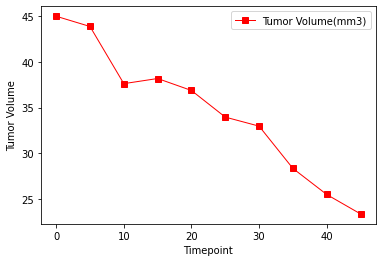

In [35]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
clean_mice_study_Capomulin_line_df = clean_mice_study_results_df.loc[(clean_mice_study_results_df["Drug Regimen"]=='Capomulin') &
(clean_mice_study_results_df["Mouse ID"]=="s185")]
x_axis = np.arange(0,max(clean_mice_study_results_df["Timepoint"])+5,5)
y_axis = clean_mice_study_Capomulin_line_df["Tumour Volume (mm3)"]
tumorvolume, = plt.plot(x_axis, y_axis, marker="s", color="Red", linewidth=1, label="Tumor Volume(mm3)")
plt.legend(handles=[tumorvolume], loc="best")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()


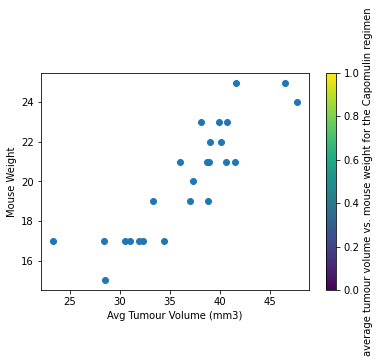

In [36]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
clean_mice_study_Capomulin_line_df_v1 = clean_mice_study_results_v2.loc[clean_mice_study_results_v2["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
clean_mice_study_Capomulin_line_df_avg = clean_mice_study_Capomulin_line_df_v1["Tumour Volume (mm3)"].mean()
clean_mice_study_Capomulin_line_df_max = clean_mice_study_Capomulin_line_df_v1["Weight (g)"].max()
clean_mice_study_Capomulin_line_df_avg_v1 =clean_mice_study_Capomulin_line_df_avg.reset_index()
clean_mice_study_Capomulin_line_df_max_v1 =clean_mice_study_Capomulin_line_df_max.reset_index()
clean_mice_study_Capomulin_scatter_df = clean_mice_study_Capomulin_line_df_avg_v1.merge(clean_mice_study_Capomulin_line_df_max_v1,how = "inner", on="Mouse ID")
plt.scatter(clean_mice_study_Capomulin_scatter_df["Tumour Volume (mm3)"],clean_mice_study_Capomulin_scatter_df["Weight (g)"])
clb = plt.colorbar()
plt.xlabel("Avg Tumour Volume (mm3)")
plt.ylabel("Mouse Weight")
clb.set_label("average tumour volume vs. mouse weight for the Capomulin regimen")
plt.show()


## Correlation and Regression

line equation : y = 0.44x + 4.02


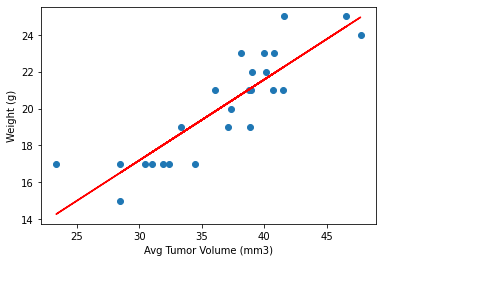

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
x_values = clean_mice_study_Capomulin_scatter_df["Tumour Volume (mm3)"]
y_values = clean_mice_study_Capomulin_scatter_df["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="black")
plt.xlabel('Avg Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
print(f"line equation : {line_eq}")
plt.show()

In [38]:
#correlation coefficient
print(f"The correlation coefficient between Avg Tumor Volume (mm3) and Weight (g) is {round(st.pearsonr(x_values,y_values)[0],2)}")

The correlation coefficient between Avg Tumor Volume (mm3) and Weight (g) is 0.88
